In [305]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [306]:
ticker = "BAJFINANCE.NS"
# ticker='TCS.NS'
company = yf.Ticker(ticker)
sp500 = company.history(period="max")  # You can change the period as needed
company_info = company.info
print("Type of company_info:", type(company_info))

# company_full_name = company_info.get('longName', 'Name not found')

company_full_name = company_info.get('longName', 'Name not found')
print("Company Full Name:", company_full_name)


Type of company_info: <class 'dict'>
Company Full Name: Bajaj Finance Limited


In [307]:

sp500.index

DatetimeIndex(['2002-07-01 00:00:00+05:30', '2002-07-02 00:00:00+05:30',
               '2002-07-03 00:00:00+05:30', '2002-07-04 00:00:00+05:30',
               '2002-07-05 00:00:00+05:30', '2002-07-08 00:00:00+05:30',
               '2002-07-09 00:00:00+05:30', '2002-07-10 00:00:00+05:30',
               '2002-07-11 00:00:00+05:30', '2002-07-12 00:00:00+05:30',
               ...
               '2024-06-07 00:00:00+05:30', '2024-06-10 00:00:00+05:30',
               '2024-06-11 00:00:00+05:30', '2024-06-12 00:00:00+05:30',
               '2024-06-13 00:00:00+05:30', '2024-06-14 00:00:00+05:30',
               '2024-06-18 00:00:00+05:30', '2024-06-19 00:00:00+05:30',
               '2024-06-20 00:00:00+05:30', '2024-06-21 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=5455, freq=None)

In [308]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<Axes: xlabel='Date'>

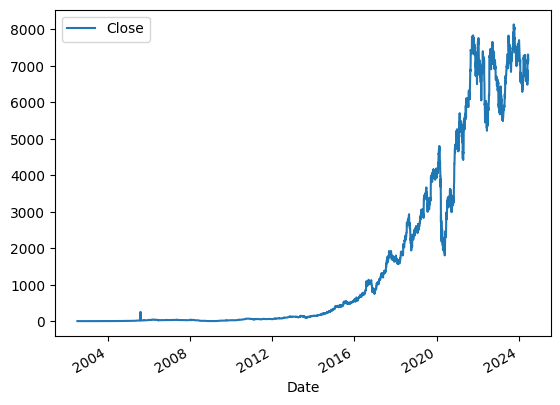

In [309]:
sp500.plot.line(y='Close', use_index=True)

In [310]:
sp500=sp500.drop(columns=['Dividends', 'Stock Splits'])

In [311]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

### We took the shift Column and we took the price back 1 day.

In [312]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [313]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2002-07-01 00:00:00+05:30,3.823833,4.043635,3.823833,3.950042,21923,3.972731
2002-07-02 00:00:00+05:30,4.030872,4.040798,3.956423,3.972731,61044,3.989040
2002-07-03 00:00:00+05:30,4.018110,4.047180,3.888357,3.989040,34160,4.034418
2002-07-04 00:00:00+05:30,4.014565,4.066324,3.953588,4.034418,27892,4.079796
2002-07-05 00:00:00+05:30,4.059943,4.128011,3.995421,4.079796,58976,4.105322
...,...,...,...,...,...,...
2024-06-14 00:00:00+05:30,7259.605693,7333.186503,7210.800894,7304.878418,1187488,7298.062988
2024-06-18 00:00:00+05:30,7328.211444,7392.339707,7263.536122,7298.062988,946904,7197.816406
2024-06-19 00:00:00+05:30,7298.063157,7312.241978,7142.046086,7197.816406,520400,7171.100098


In [314]:
sp500['Target'] = (sp500["Tomorrow"] > sp500['Close']).astype(int)

In [315]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2002-07-01 00:00:00+05:30,3.823833,4.043635,3.823833,3.950042,21923,3.972731,1
2002-07-02 00:00:00+05:30,4.030872,4.040798,3.956423,3.972731,61044,3.989040,1
2002-07-03 00:00:00+05:30,4.018110,4.047180,3.888357,3.989040,34160,4.034418,1
2002-07-04 00:00:00+05:30,4.014565,4.066324,3.953588,4.034418,27892,4.079796,1
2002-07-05 00:00:00+05:30,4.059943,4.128011,3.995421,4.079796,58976,4.105322,1
...,...,...,...,...,...,...,...
2024-06-14 00:00:00+05:30,7259.605693,7333.186503,7210.800894,7304.878418,1187488,7298.062988,0
2024-06-18 00:00:00+05:30,7328.211444,7392.339707,7263.536122,7298.062988,946904,7197.816406,0
2024-06-19 00:00:00+05:30,7298.063157,7312.241978,7142.046086,7197.816406,520400,7171.100098,0


In [316]:
sp500 = sp500.loc['1990-01-01':].copy()
# sp500 = sp500.loc[:'2022-05-18'].copy()

In [317]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2002-07-01 00:00:00+05:30,3.823833,4.043635,3.823833,3.950042,21923,3.972731,1
2002-07-02 00:00:00+05:30,4.030872,4.040798,3.956423,3.972731,61044,3.989040,1
2002-07-03 00:00:00+05:30,4.018110,4.047180,3.888357,3.989040,34160,4.034418,1
2002-07-04 00:00:00+05:30,4.014565,4.066324,3.953588,4.034418,27892,4.079796,1
2002-07-05 00:00:00+05:30,4.059943,4.128011,3.995421,4.079796,58976,4.105322,1
...,...,...,...,...,...,...,...
2024-06-14 00:00:00+05:30,7259.605693,7333.186503,7210.800894,7304.878418,1187488,7298.062988,0
2024-06-18 00:00:00+05:30,7328.211444,7392.339707,7263.536122,7298.062988,946904,7197.816406,0
2024-06-19 00:00:00+05:30,7298.063157,7312.241978,7142.046086,7197.816406,520400,7171.100098,0


## Random forest Classifier

In [318]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [319]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [320]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')

In [321]:
features=['Close','Volume','Open','High','Low']

# Extract features and target for training
X_train = train[features]
y_train = train['Target']

# Extract features and target for testing
X_test = test[features]
y_test = test['Target']

In [322]:


model.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=100, random_state=1)

### Predict Data

In [323]:
from sklearn.metrics import precision_score

preds = model.predict(test[features])

In [324]:
preds = pd.Series(preds,index=test.index)


In [325]:
preds

Date
2024-01-23 00:00:00+05:30    1
2024-01-24 00:00:00+05:30    1
2024-01-25 00:00:00+05:30    1
2024-01-29 00:00:00+05:30    0
2024-01-30 00:00:00+05:30    1
                            ..
2024-06-14 00:00:00+05:30    0
2024-06-18 00:00:00+05:30    0
2024-06-19 00:00:00+05:30    1
2024-06-20 00:00:00+05:30    0
2024-06-21 00:00:00+05:30    1
Length: 100, dtype: int64

In [326]:
precision_score(y_test,preds)

np.float64(0.5645161290322581)

In [327]:
combined = pd.concat([y_test,preds],axis=1)


<Axes: xlabel='Date'>

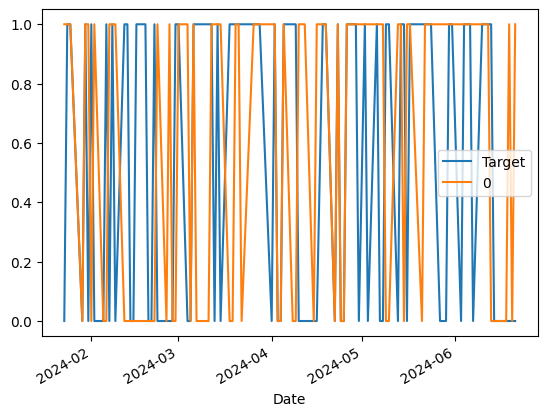

In [328]:
combined.plot()

In [329]:
def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    preds = model.predict(test[features])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [330]:
def backtest(data, model, features, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, features, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [331]:
predictions = backtest(sp500, model, features)

In [332]:
predictions['Predictions'].value_counts()

Predictions
0    1719
1    1236
Name: count, dtype: int64

In [333]:
precision_score(predictions['Target'], predictions['Predictions'])

np.float64(0.5339805825242718)

In [334]:
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.522166
0    0.477834
Name: count, dtype: float64

#### Mean of closed price of several days and years

In [335]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    # sp500[ratio_columns] = sp500['Close']/rolling_averages["Close"]
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column, trend_column]
    
    

In [336]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2002-07-01 00:00:00+05:30,3.823833,4.043635,3.823833,3.950042,21923,3.972731,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-02 00:00:00+05:30,4.030872,4.040798,3.956423,3.972731,61044,3.989040,1,1.002864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-03 00:00:00+05:30,4.018110,4.047180,3.888357,3.989040,34160,4.034418,1,1.002048,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-04 00:00:00+05:30,4.014565,4.066324,3.953588,4.034418,27892,4.079796,1,1.005656,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-05 00:00:00+05:30,4.059943,4.128011,3.995421,4.079796,58976,4.105322,1,1.005592,2.0,1.018623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14 00:00:00+05:30,7259.605693,7333.186503,7210.800894,7304.878418,1187488,7298.062988,0,1.003184,2.0,1.017365,4.0,1.057953,38.0,1.021018,126.0,1.186872,516.0
2024-06-18 00:00:00+05:30,7328.211444,7392.339707,7263.536122,7298.062988,946904,7197.816406,0,0.999533,1.0,1.009537,4.0,1.054887,37.0,1.019864,126.0,1.184799,516.0
2024-06-19 00:00:00+05:30,7298.063157,7312.241978,7142.046086,7197.816406,520400,7171.100098,0,0.993084,0.0,0.993050,3.0,1.038581,37.0,1.005728,125.0,1.167607,515.0


In [337]:
sp500  = sp500.dropna()

In [338]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2006-05-30 00:00:00+05:30,38.199027,38.199027,35.591307,37.439331,25309,35.354004,0,1.006390,2.0,1.033249,3.0,0.931105,22.0,1.176909,132.0,3.005053,508.0
2006-05-31 00:00:00+05:30,37.419693,37.419693,34.690766,35.354004,94886,33.221737,0,0.971353,1.0,0.960569,3.0,0.881867,22.0,1.108724,131.0,2.830546,507.0
2006-06-01 00:00:00+05:30,33.989114,35.307058,33.132110,33.221737,16148,33.704872,1,0.968906,0.0,0.934786,2.0,0.832692,21.0,1.039789,130.0,2.653619,506.0
2006-06-02 00:00:00+05:30,32.975905,34.301531,30.410866,33.704872,33666,32.578140,0,1.007219,1.0,0.953819,3.0,0.848744,21.0,1.052760,130.0,2.685845,506.0
2006-06-05 00:00:00+05:30,34.924663,35.003194,32.508149,32.578140,3159,30.337456,0,0.983001,1.0,0.945401,2.0,0.824707,20.0,1.015640,130.0,2.590177,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-13 00:00:00+05:30,7215.975256,7288.411424,7196.025115,7258.511719,1345495,7304.878418,1,1.005320,2.0,1.015132,4.0,1.053626,37.0,1.014701,125.0,1.180284,516.0
2024-06-14 00:00:00+05:30,7259.605693,7333.186503,7210.800894,7304.878418,1187488,7298.062988,0,1.003184,2.0,1.017365,4.0,1.057953,38.0,1.021018,126.0,1.186872,516.0
2024-06-18 00:00:00+05:30,7328.211444,7392.339707,7263.536122,7298.062988,946904,7197.816406,0,0.999533,1.0,1.009537,4.0,1.054887,37.0,1.019864,126.0,1.184799,516.0


In [339]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [340]:
def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    preds = model.predict_proba(test[features])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [341]:
predictions = backtest(sp500,model,new_predictors)

In [342]:
predictions['Predictions'].value_counts()

Predictions
0.0    1823
1.0     131
Name: count, dtype: int64

In [343]:
precision_score(predictions['Target'],predictions['Predictions'])


np.float64(0.5801526717557252)

In [344]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')

In [345]:
print(sp500.index)


DatetimeIndex(['2006-05-30 00:00:00+05:30', '2006-05-31 00:00:00+05:30',
               '2006-06-01 00:00:00+05:30', '2006-06-02 00:00:00+05:30',
               '2006-06-05 00:00:00+05:30', '2006-06-06 00:00:00+05:30',
               '2006-06-07 00:00:00+05:30', '2006-06-08 00:00:00+05:30',
               '2006-06-09 00:00:00+05:30', '2006-06-12 00:00:00+05:30',
               ...
               '2024-06-06 00:00:00+05:30', '2024-06-07 00:00:00+05:30',
               '2024-06-10 00:00:00+05:30', '2024-06-11 00:00:00+05:30',
               '2024-06-12 00:00:00+05:30', '2024-06-13 00:00:00+05:30',
               '2024-06-14 00:00:00+05:30', '2024-06-18 00:00:00+05:30',
               '2024-06-19 00:00:00+05:30', '2024-06-20 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=4454, freq=None)


In [346]:
sp500_history_sorted = sp500.sort_index(ascending=False)


In [347]:
sp500_history_sorted.to_csv(f'data/{company_full_name}.csv')